# Multilayer perceptron vs logistic regression

Illustration of multilayer perceptron (neural network- NN) using scikit learn `MLPClassifier`
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    

- In this simple example of binary classification, we will illustrate how a NN with hidden layer perform better than a linear model like logistic regression.
- For Regression use `MLPRegressor`

In [298]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import datasets

#Multilayer perceptron function
from sklearn.neural_network import MLPClassifier

### Generate example data (with two classes) which is not completely linearly separable

- Generate about 2000 data points in two dimensions available in sklearn datasets.
- Use the datasets available in scikit-learn
- `x` is the feature data, `y` is the class labels (0 or 1)
- Scatter plot data points (red - class 1, blue - class 0. The data is mostly linearly separable but not completely.

In [218]:
(x,y) = datasets.make_moons(n_samples=10000, noise=0.08, random_state=42)

In [219]:
print(x.shape)
print(y.shape)

(10000, 2)
(10000,)


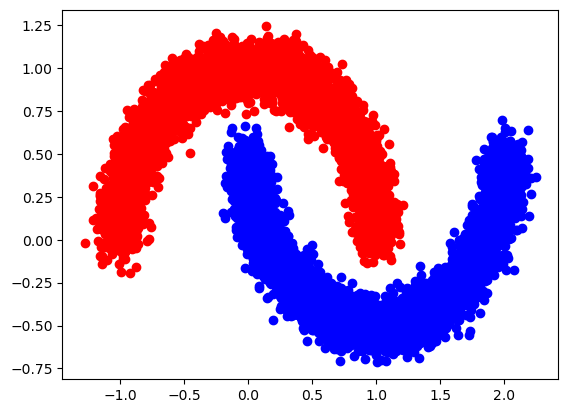

In [220]:
plt.scatter(x[y==0,0],x[y==0,1], c='r')
plt.scatter(x[y==1,0],x[y==1,1], c='b')

### Train test split and scaling

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =scaler.transform(x_test)

### Results of logistic regression

In [299]:
from sklearn.linear_model import LogisticRegression

logit       = LogisticRegression(penalty=None) # no regularization as indicated by parameter penalty
model_logit = logit.fit(x_train_scaled, y_train)
print('training accuracy')
print(accuracy_score(y_train,model_logit.predict(x_train_scaled)))
print('testing accuracy')
print(accuracy_score(y_test,model_logit.predict(x_test_scaled)))

training accuracy
0.881875
testing accuracy
0.9025


The accuracy is pretty decent.

### Plot decision boundary of logistic regression

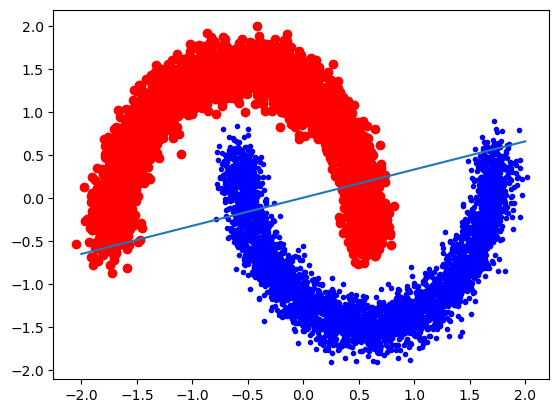

In [300]:
x = np.linspace(-2,2,100)

'''
equation of line is y = mx + c

logistic regression boundary is 
b0 + b1*x1 + b2*x2 = 0
or x2 = -((b1/b2)*x1 + b0/b2)
'''

y=-(model_logit.coef_[0][0]/model_logit.coef_[0][1])*x - model_logit.intercept_/model_logit.coef_[0][1]
plt.plot(x,y)

mask = (y_train == 0)
plt.scatter(x_train_scaled[mask,0], x_train_scaled[mask,1], c='r')
mask = (y_train == 1)
plt.scatter(x_train_scaled[mask,0], x_train_scaled[mask,1], c='b',marker='.')

Since the data is not completely linearly separable, there are some points which are misclassified.

### Results of Neural network 

- Two hidden layers with 20 nodes and 2 nodes. The last hidden layer has 2 nodes. I put 2 nodes in the last hidden layer so that i can scatter plot the output in two dimensions later on.
- relu activation layer
- early stopping
- No need to provide number of nodes in input layer and output layer. Automatically determined from x_train, and y_train.
- classification - softmax or sigmoid, regression - identity activation in the output layer
- NN model achieves higher accuracy than logistic regression

In [309]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier (hidden_layer_sizes=(20,2),# two hidden layers
                                                 max_iter=100,
                                                 activation = 'relu',
                                                 solver='adam',batch_size=200,# mini batch
                                                 n_iter_no_change=10,
                                                 early_stopping=True) #early stopping
nn_model.fit(x_train_scaled,y_train)
nn_model.predict(x_test_scaled)
print(accuracy_score(y_train,nn_model.predict(x_train_scaled)))
print(accuracy_score(y_test,nn_model.predict(x_test_scaled)))

0.99925
0.9995


### Exploring the weights of the NN model

In [318]:
print("weights in the model ")
for i in range(0,len(nn_model.coefs_)):
    print(f"weights between layer {i} and layer {i+1}")
    print(nn_model.coefs_[i].shape)

print("bias/intercepts weights in the model")
for i in range(0,len(nn_model.intercepts_)):
    print(f"bias/intercepts weights between layer {i} and layer {i+1}")
    print(nn_model.intercepts_[i].shape)

weights in the model 
weights between layer 0 and layer 1
(2, 20)
weights between layer 1 and layer 2
(20, 2)
weights between layer 2 and layer 3
(2, 1)
bias/intercepts weights in the model
bias/intercepts weights between layer 0 and layer 1
(20,)
bias/intercepts weights between layer 1 and layer 2
(2,)
bias/intercepts weights between layer 2 and layer 3
(1,)


### Between the final hidden layer and output layer - it is a logistic regression

In [323]:
print("weights and bias between the final hidden layer and output layer ")
print(nn_model.coefs_[2])
print(nn_model.intercepts_[2])
print('decision boundary representing the logistic regression between the final hidden layer and output layer ')
print('nn_model.intercepts_[2][0] + nn_model.coefs_[2][0]*x1 + nn_model.coefs_[2][1]*x1 = 0')

weights and bias between the final hidden layer and output layer 
[[ 2.4045793 ]
 [-0.92433275]]
[-0.54459555]
decision boundary representing the logistic regression between the final hidden layer and output layer 
nn_model.intercepts_[2][0] + nn_model.coefs_[2][0]*x1 + nn_model.coefs_[2][1]*x1 = 0


## compute output of final hidden layer

In [315]:
def relu(z):
    return max(0,z)

#vectorize the function
vectorized_relu = np.vectorize(relu)

print("input data ", x_train_scaled.shape)
h1_in = (np.matmul(x_train_scaled, nn_model.coefs_[0]) + nn_model.intercepts_[0])
h1_out=vectorized_relu(h1_in)
print("hidden layer # 1 output ",h1_out.shape)

h2_in = (np.matmul(h1_out, nn_model.coefs_[1]) + nn_model.intercepts_[1])
h2_out=vectorized_relu(h2_in)

print("hidden layer # 2 output ",h2_in.shape)


h2_in = (np.matmul(h1_out, nn_model.coefs_[1]) + nn_model.intercepts_[1])
h2_out=vectorized_relu(h2_in)


input data  (8000, 2)
hidden layer # 1 output  (8000, 20)
hidden layer # 2 output  (8000, 2)


## Scatter plot output of final hidden layer

The original data points after passing through the final hidden layer is more linearly separable

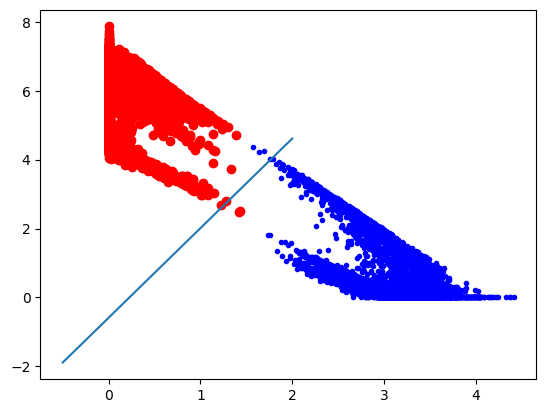

In [316]:
x = np.linspace(-0.5,2,100)
'''

equation of line is y = mx + c

logistic regression decision boundary between the final hidden layer and output layer 
b0 + b1*x1 + b2*x2 = 0
or x2 = -((b1/b2)*x1 + b0/b2)

'''
y=-(nn_model.coefs_[2][0]/nn_model.coefs_[2][1])*x - nn_model.intercepts_[2]/nn_model.coefs_[2][1]
plt.plot(x,y)

mask = (y_train == 0)
plt.scatter(h2_out[mask,0], h2_out[mask,1], c='r')
mask = (y_train == 1)
plt.scatter(h2_out[mask,0], h2_out[mask,1], c='b',marker='.')